## Visualize the recovery trajectories -- is there evidence for 'clonal expansion' driving increased IBD?

In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *
from lib.response  import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import seaborn as sns

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

In [3]:
# Font sizes
plt.rc('font', size=12)         # controls default text sizes
plt.rc('axes', titlesize=14)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

## Preferences

In [4]:
analysis_metrics = ["HX", "VX", 
                    'frac_mixed_samples','mean_k',
                    'n_segregating','pi','theta',
                    'avg_frac_ibd', 'avg_n_ibd','avg_l_ibd']

In [5]:
cols = [sns.color_palette("Blues", 6)[4], 
        sns.color_palette("Greens", 6)[4],
        sns.color_palette("Reds", 6)[4]]

In [6]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)",
    "avg_l_ibd": "Avg. IBD\nTrack Length (bp)"
})

In [7]:
savefig = False

## Load averaged data

In [8]:
expts = ["art", "bed", "ins"]

In [9]:
temp = "../analysis/2020-06-07_intv-%s"

ots_mu = []
ots_se = []
epoch_dfs = []

for expt in expts:
    # Path
    expt_path = temp % expt
    
    # Load full data
    epoch_df = pd.read_csv(expt_path + "/epoch_df.csv")
    epoch_df.index = epoch_df.name
    op_mu = pd.read_csv(expt_path + "/ops_mean.csv")
    op_se = pd.read_csv(expt_path + "/ops_se.csv")
    og_mu = pd.read_csv(expt_path + "/ogs_mean.csv")
    og_se = pd.read_csv(expt_path + "/ogs_se.csv")
    
    # Merge
    ot_mu = pd.merge(left=op_mu, right=og_mu, on="t0")
    ot_se = pd.merge(left=op_se, right=og_se)
    
    # Store
    ots_mu.append(ot_mu)
    ots_se.append(ot_se)
    epoch_dfs.append(epoch_df)

## Plot averaged

In [10]:
metrics = ["avg_frac_ibd", "avg_n_ibd", "avg_l_ibd"]

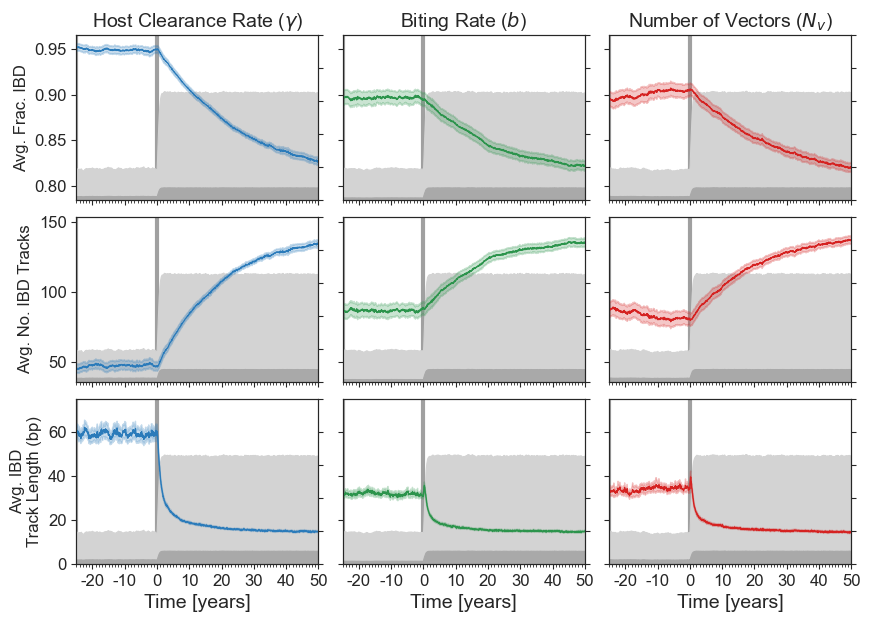

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, metric in enumerate(metrics):
    for j, ot_mu in enumerate(ots_mu):
        genetic_trajectory_average_plot(metric, ots_mu[j], ots_se[j], epoch_dfs[j],
                                    cols[j], ax[i, j],
                                    norm_t0=("Recovery", "t0"),
                                    indicate_epochs=[("Recovery", "t0"), ("CrashVar", "t0")],
                                    time_limits=epoch_df.loc["CrashVar", "t0"] + (0, 75*365),
                                    years_per_major_tick=10)
        
        
        # y
        if j == 0:
            ax[i, j].set_ylabel(genetic_names[metric], fontsize=12)
        else:
            ax[i, j].set_ylabel("")
            
        # y-lims
        if metric == "avg_l_ibd":
            ax[i, j].set_ylim((0, 75))
            ax[i, j].set_xlabel("Time [years]")
        
ax[0, 0].set_title("Host Clearance Rate ($\gamma$)")
ax[0, 1].set_title("Biting Rate ($b$)")
ax[0, 2].set_title("Number of Vectors ($N_v$)")

if savefig:
    fig.savefig("../figs/sec3_recovery-ibd-all-avg.pdf", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec3_recovery-ibd-all-avg.png", bbox_inches="tight", pad_inches=0.5)

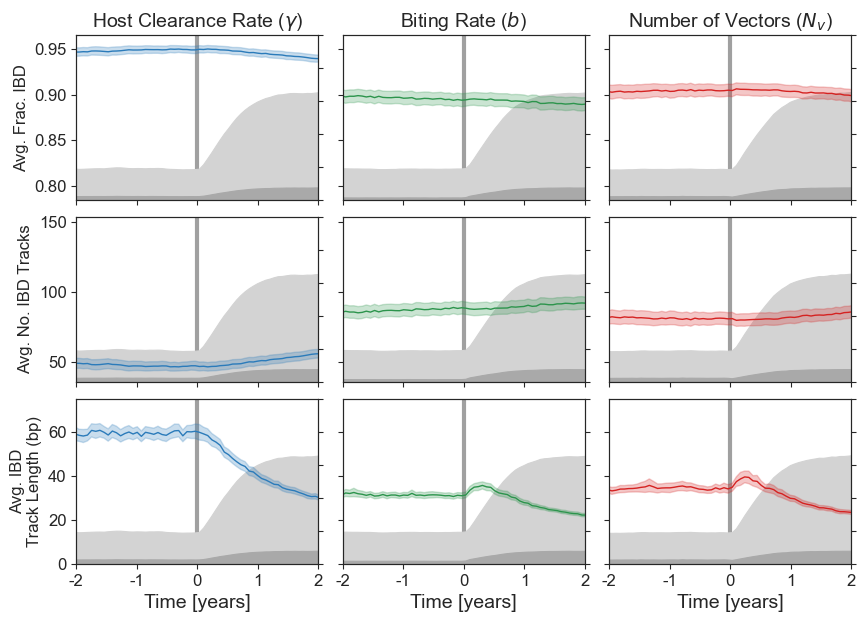

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, metric in enumerate(metrics):
    for j, ot_mu in enumerate(ots_mu):
        genetic_trajectory_average_plot(metric, ots_mu[j], ots_se[j], epoch_dfs[j],
                                    cols[j], ax[i, j],
                                    norm_t0=("Recovery", "t0"),
                                    indicate_epochs=[("Recovery", "t0"), ("CrashVar", "t0")],
                                    time_limits=epoch_df.loc["Recovery", "t0"] + (-365*2, 365*2),
                                    years_per_major_tick=1)
        
        
        # y
        if j == 0:
            ax[i, j].set_ylabel(genetic_names[metric], fontsize=12)
        else:
            ax[i, j].set_ylabel("")
            
        # y-lims
        if metric == "avg_l_ibd":
            ax[i, j].set_ylim((0, 75))
            ax[i, j].set_xlabel("Time [years]")
        
ax[0, 0].set_title("Host Clearance Rate ($\gamma$)")
ax[0, 1].set_title("Biting Rate ($b$)")
ax[0, 2].set_title("Number of Vectors ($N_v$)")

if savefig:
    fig.savefig("../figs/sec3_recovery-ibd-all-avg.pdf", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec3_recovery-ibd-all-avg.png", bbox_inches="tight", pad_inches=0.5)

## Zoom

In [13]:
savefig = True

In [14]:
metric = "avg_l_ibd"

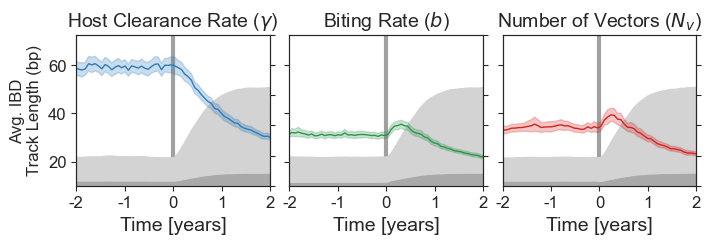

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(8, 2), sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)


for j in np.arange(3):
    genetic_trajectory_average_plot(metric, ots_mu[j], ots_se[j], epoch_dfs[j],
                                    cols[j], ax[j],
                                    norm_t0=("Recovery", "t0"),
                                    indicate_epochs=[("Recovery", "t0"), ("CrashVar", "t0")],
                                    time_limits=epoch_df.loc["Recovery", "t0"] + (-2*365, 2*365),
                                    years_per_major_tick=1)


    # y
    if j == 0:
        ax[j].set_ylabel(genetic_names[metric], fontsize=12)
    else:
        ax[j].set_ylabel("")

    # y-lims
    if metric == "avg_l_ibd":
        #ax[i, j].set_ylim((0, 150))
        ax[j].set_xlabel("Time [years]")
        
ax[0].set_title("Host Clearance Rate ($\gamma$)")
ax[1].set_title("Biting Rate ($b$)")
ax[2].set_title("Number of Vectors ($N_v$)")

if savefig:
    fig.savefig("../figs/sec3_recovery-ibd-length-avg.pdf", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec3_recovery-ibd-length-avg.png", bbox_inches="tight", pad_inches=0.5)